In [63]:
import time

from scipy import stats
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifft, ifftshift
from matplotlib import pyplot as plt
from scipy.ndimage import label
from scipy.stats import trapezoid

In [64]:
def continuous_approx_fft(signal, dt):
    N = len(signal)
    fft_vals = fftshift(fft(ifftshift(signal))) * dt
    nu = fftshift(fftfreq(N, dt))
    return nu, fft_vals

In [65]:
a1 = 2.7
a2 = 1.83

w1 = 5.2
w2 = 9.72

phi1 = 0.7
phi2 = 0.15

def y_1(t):
    return a1*np.sin(w1*t + phi1) + a2*np.sin(w2*t + phi2)

In [66]:
b = 5.3
def y_2(t):
    return np.sinc(b*t/np.pi)

In [67]:
hq_T = 50
hq_t = np.linspace(-hq_T, hq_T, 50_000)

r_T = 50
r_t = np.linspace(-r_T, r_T, 50_000)

In [68]:
n = np.arange(-100, 101)

def interpolate(res_t, t, ft, B):
    f_new = np.zeros_like(res_t)
    for i, t_val in enumerate(res_t):
        f_new[i] = np.sum(ft * np.sinc(2*B * (t_val - t)))
    return f_new

In [69]:
## dnu = 1 / T
def build_func(vals, f, f_lim, B):
    hq_f = f(hq_t)
    
    hq_nu, hq_f_f = continuous_approx_fft(hq_f, hq_t[1] - hq_t[0])
    # print(hq_nu[np.where(hq_f_f > 0.05)[0]])
    print(np.trapezoid(hq_f**2, hq_t)**0.5)
    
    plt.figure(figsize=(12, 9))
    plt.subplot(2, 1, 1)
    plt.plot(hq_t, hq_f, label="Исходная функция")
    plt.xlim(-5, 5)
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(hq_nu, hq_f_f, label="Фурье образ")
    plt.axvline(-B, color='r',linestyle='--')
    plt.axvline(B, color='r',linestyle='--')
    plt.xlim(-5, 5)
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    for dt, T in vals:
        B = 1/(2*dt)
        print(dt, T, B)
        t = np.arange(-T/2, T/2+dt, dt)
        ft = f(t)
        
        restored = interpolate(r_t, t, ft, B)
        # restored = np.interp(r_t, t, ft)
        
        plt.figure(figsize=(12, 7.3))
        plt.subplot(2, 1, 1)
        plt.plot(hq_t, hq_f, label="Непрерывная функция", linewidth=5, color='y')
        plt.plot(t, ft, label="Сэмплированная функция", alpha=0.9,linewidth=3, color='green')
        plt.plot(r_t, restored, label="Восстановленная функция", alpha=0.9, linewidth=2, color='tomato')
        plt.xlim(-5, 5)
        plt.legend()
        plt.grid(True)
        
        f_nu, ft_f = continuous_approx_fft(ft, dt)
        restored_nu, restored_f = continuous_approx_fft(restored, hq_t[1] - hq_t[0])
        d_nu = 1/T
        d_nu_r = restored_nu[1] - restored_nu[0]
        
        plt.title(f"{dt=}, {T=}, {d_nu=: .2f}, B={round(B, 4)}")
        
        plt.subplot(2, 1, 2)
        plt.axvline(-B, color='r',linestyle='--')
        plt.axvline(B, color='r',linestyle='--')
        plt.plot(hq_nu, hq_f_f, label="Непрерывная функция", linewidth=3, color='y')
        plt.plot(f_nu, ft_f, label="Семплированная функция", alpha=0.5, linewidth=3, color='green')
        plt.plot(restored_nu, restored_f, label="Восстановленная функция", alpha=0.8, linewidth=2, color='tomato')
        plt.xlim(-f_lim, f_lim)
        # plt.ylim(-1, 15)
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()

        plt.show()

23.071473240995132


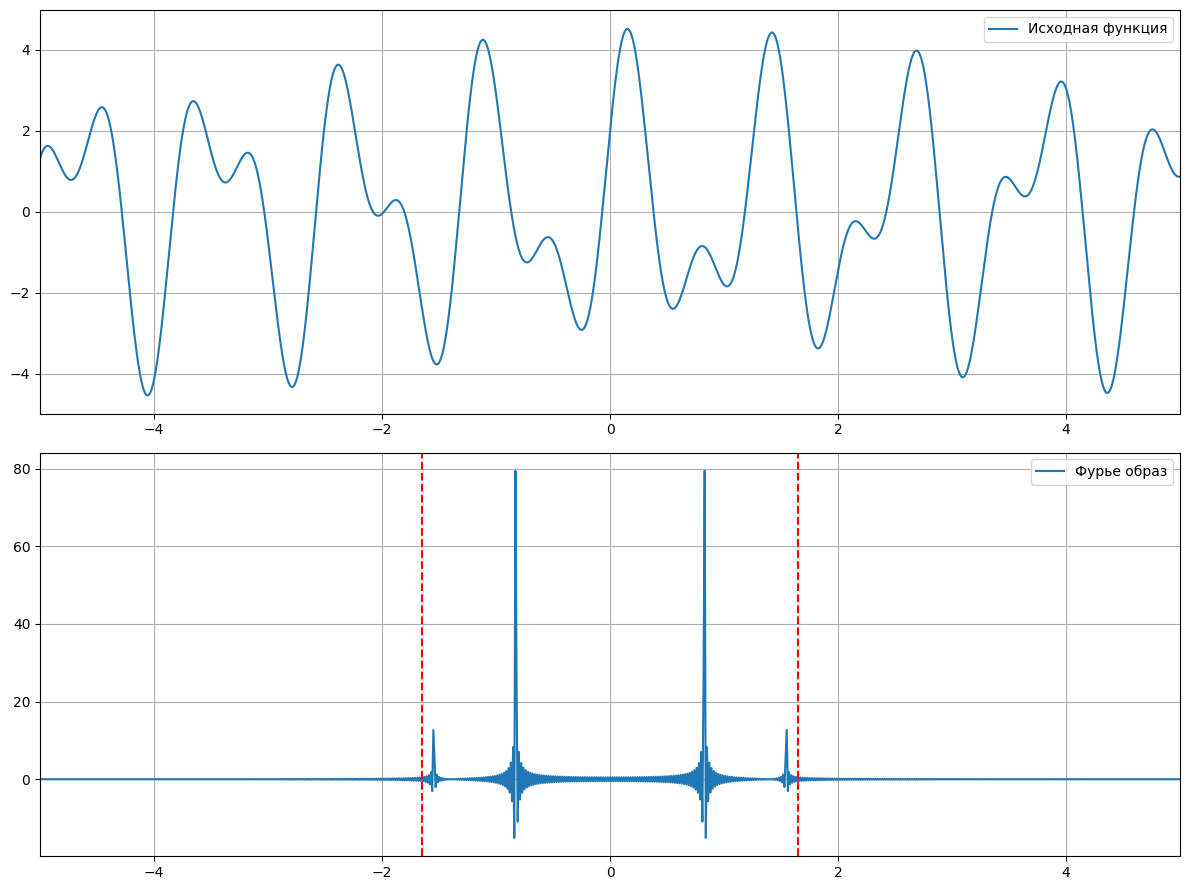

1 100 0.5


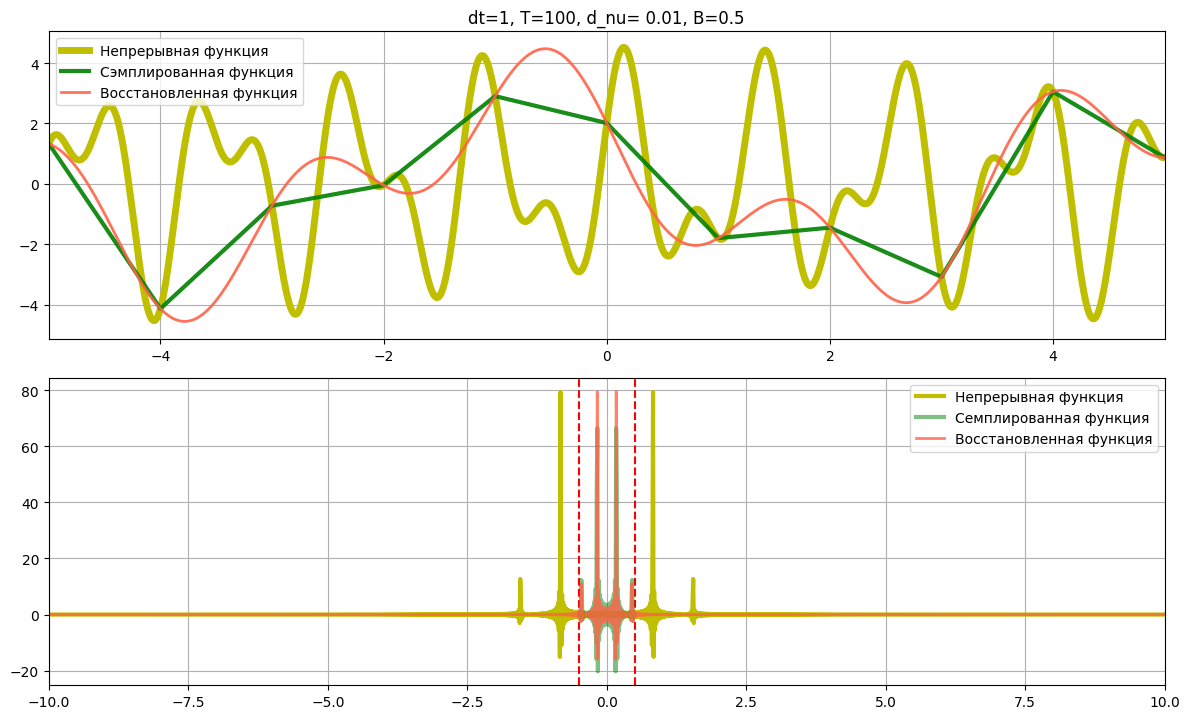

1 4 0.5


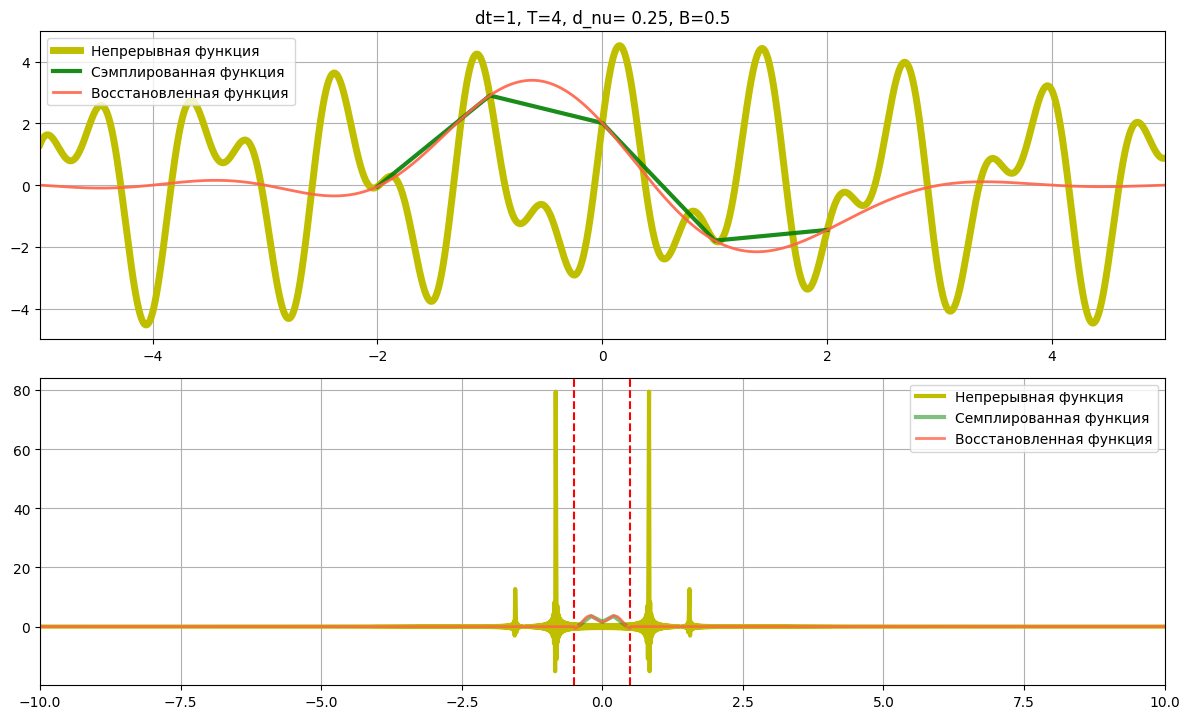

In [70]:
T = 100
build_func([
    (1, T),
    (1, 4),
], y_1, 10, 1.65)

0.7694415211894798


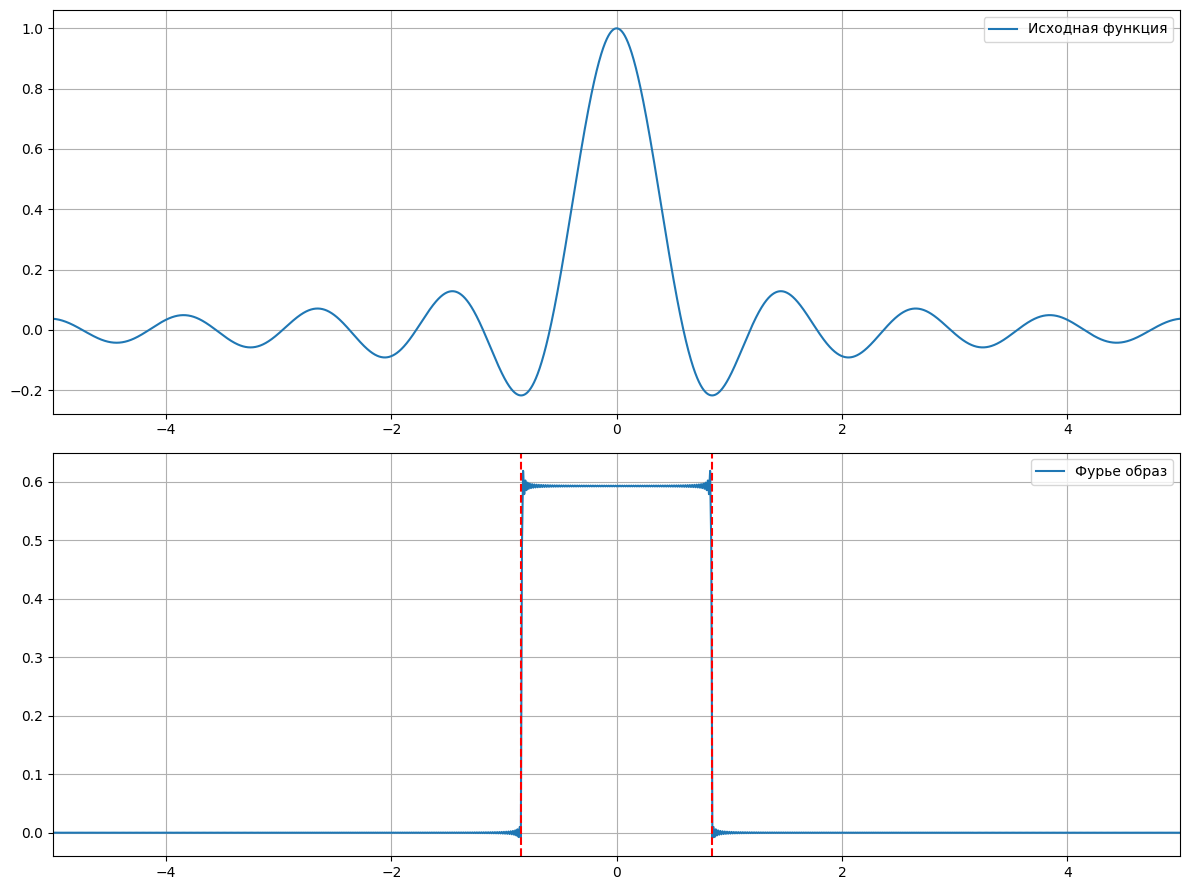

1 100 0.5


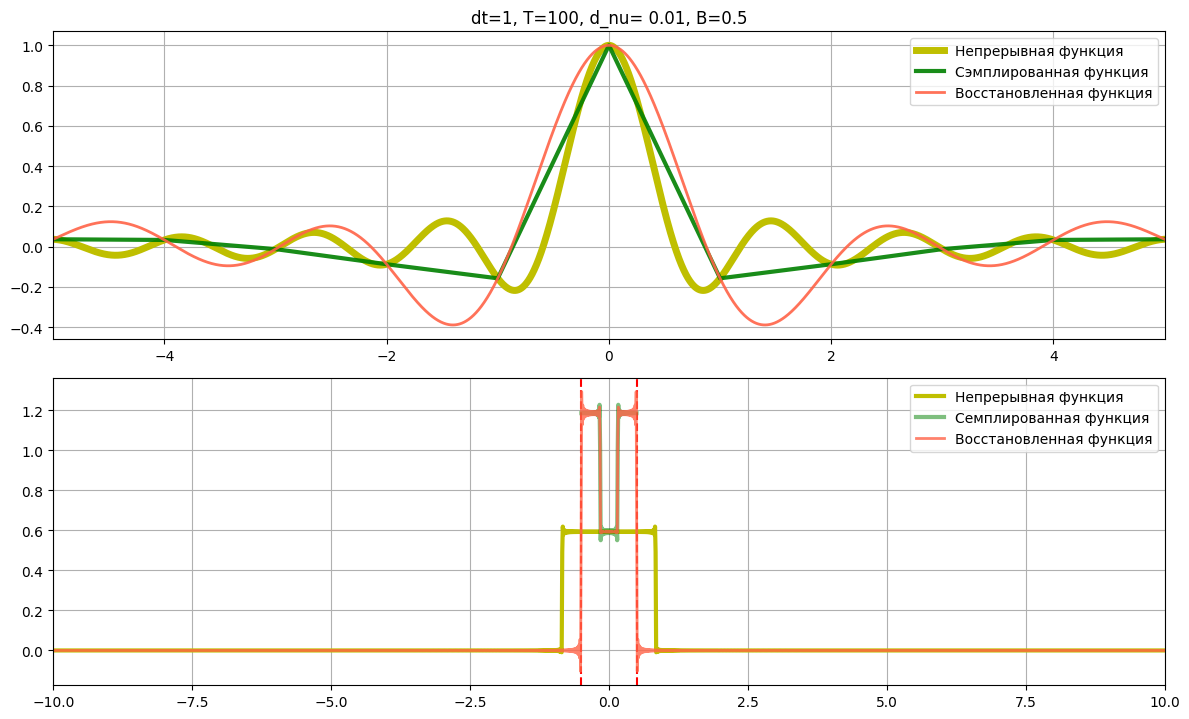

1 4 0.5


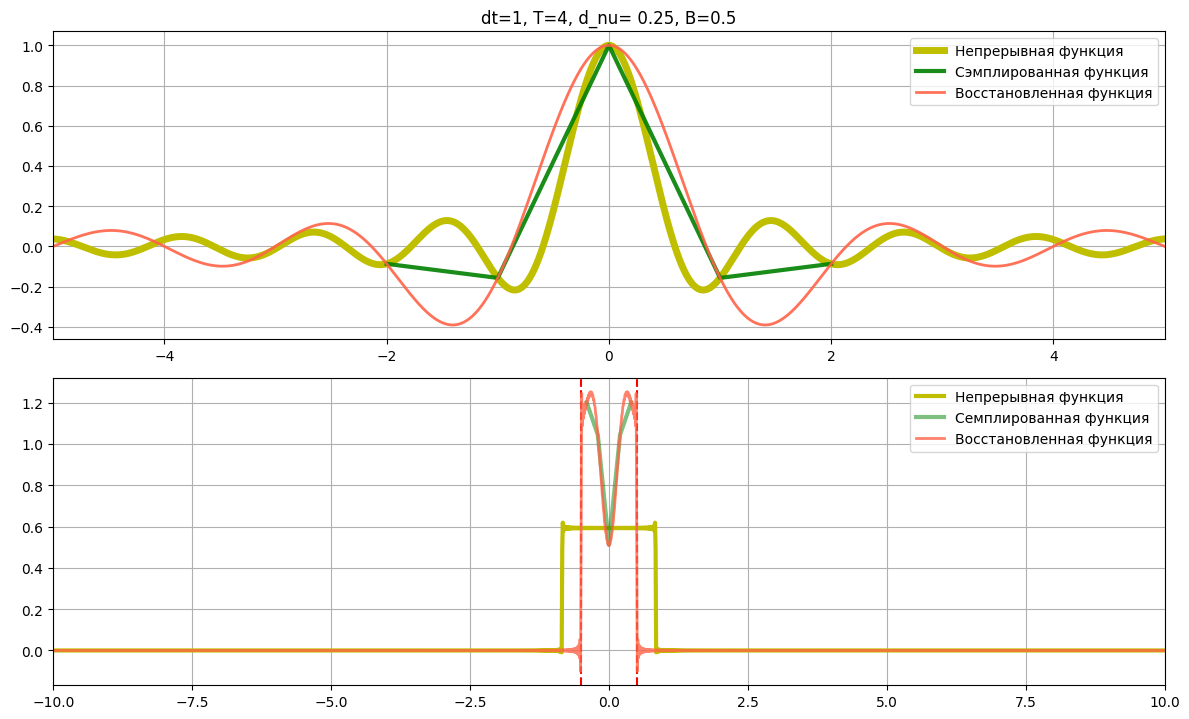

In [71]:
T = 100
build_func([
    (1, T),
    (1, 4),
], y_2, 10, 0.85)